***В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.***



Вам належить запропонувати **свою власну архітектуру мережі**.

**Точність** найнаївнішої, але адекватної нейромережі становить приблизно **91%**. Точність вашої моделі повинна бути не нижчою за цей показник. Щоб досягти таких значень вам знадобиться поекспериментувати з гіперпараметрами мережі:



кількість шарів;
*текст курсивом*
кількість нейронів;

функції активації;

кількість епох;

розмір батчу;

вибір оптимізатора;

різні техніки регуляризації і т.д.

Використайте вивчені техніки виявлення проблем навчання нейронної мережі, і потім поекспериментуйте.


https://www.tensorflow.org/tutorials/keras/classification?hl=ru

In [13]:
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from keras.layers import Dense, Flatten


In [14]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


In [15]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [16]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)), # перетворює двовимірне зображення розміром 28x28 пікселів на одномірний масив із 784 значень (28 * 28)
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2), # шар Dropout випадково вимикає 20% (0.2) нейронів на кожному етапі тренування
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_split=0.2)
# history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)
# history = model.fit(x_train, y_train, epochs=10)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.6197 - loss: 1.0711 - val_accuracy: 0.8332 - val_loss: 0.4561
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.8297 - loss: 0.4763 - val_accuracy: 0.8643 - val_loss: 0.3739
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.8574 - loss: 0.3962 - val_accuracy: 0.8673 - val_loss: 0.3596
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.8667 - loss: 0.3647 - val_accuracy: 0.8768 - val_loss: 0.3408
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.8744 - loss: 0.3454 - val_accuracy: 0.8803 - val_loss: 0.3339
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.8807 - loss: 0.3249 - val_accuracy: 0.8830 - val_loss: 0.3255
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.8855 - loss: 0.3119 - val_accuracy: 0.8836 - val_loss: 0.3200
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.8868 - loss: 0.3034 - val_accuracy: 0.8856 - val_loss: 0.

In [20]:
history.history

{'accuracy': [0.7350416779518127,
  0.840749979019165,
  0.8586458563804626,
  0.8690833449363708,
  0.874625027179718,
  0.8809999823570251,
  0.887541651725769,
  0.887333333492279,
  0.8934583067893982,
  0.8987083435058594,
  0.8994166851043701,
  0.9019583463668823,
  0.9058541655540466,
  0.905875027179718,
  0.9070416688919067,
  0.9089375138282776,
  0.9132916927337646,
  0.9133541584014893,
  0.9155625104904175,
  0.9164999723434448],
 'loss': [0.7408538460731506,
  0.44856759905815125,
  0.39314329624176025,
  0.35972708463668823,
  0.3419824540615082,
  0.3241247236728668,
  0.3084072768688202,
  0.3026142120361328,
  0.2880294919013977,
  0.27464815974235535,
  0.2709510922431946,
  0.2638648748397827,
  0.2557779848575592,
  0.25519484281539917,
  0.24830499291419983,
  0.24340713024139404,
  0.23243646323680878,
  0.23131412267684937,
  0.2244085967540741,
  0.21844537556171417],
 'val_accuracy': [0.8331666588783264,
  0.8643333315849304,
  0.8673333525657654,
  0.8768333

In [22]:
train_loss, train_acc = model.evaluate(x_train, y_train)
print(f"\ntest accuracy: {train_acc}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9285 - loss: 0.1883

test accuracy: 0.9223666787147522


In [23]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\ntest accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8896 - loss: 0.3438

test accuracy: 0.8898000121116638


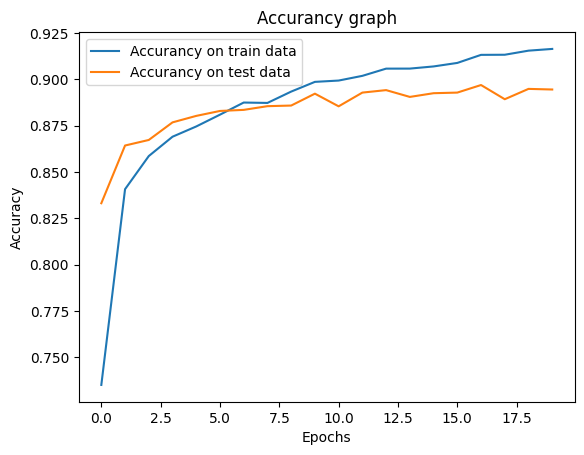

In [24]:
plt.plot(history.history['accuracy'], label='Accurancy on train data')
plt.plot(history.history['val_accuracy'], label='Accurancy on test data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accurancy graph')
plt.show()